### To Predict the different groups of people based on their spending score in a shopping mall.

### K- Means 

In [1]:
#Library files Load
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Dataset Load
data=pd.read_csv("Mall_Customers.csv")

In [3]:
data.shape

(200, 5)

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
x = data.iloc[:,[3,4]].values

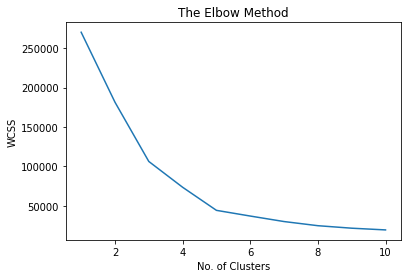

In [6]:
from sklearn.cluster import KMeans
list1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++',random_state = 42)
    kmeans.fit(x)
    list1.append(kmeans.inertia_)
plt.plot(range(1,11),list1)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init ='k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [8]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [9]:
supervised = pd.DataFrame(data)

In [10]:
supervised['Cluster_group'] = y_kmeans

In [11]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [12]:
supervised.to_csv('cluster.csv',index = False)

In [13]:
centroids = kmeans.cluster_centers_

In [14]:
centroids

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [15]:
import warnings
warnings.filterwarnings('ignore')

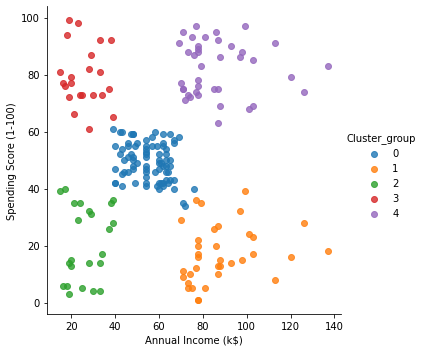

In [16]:
import seaborn as sns
facet = sns.lmplot(data=supervised, 
                   x=supervised.columns[3], 
                   y=supervised.columns[4], 
                   hue = supervised.columns[5],
                   fit_reg = False,
                   legend = True,
                   legend_out = True)